In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from blendhunter.config import BHConfig
from blendhunter.performance import get_acc

In [2]:
bhconfig = BHConfig(config_file='../data/bhconfig.yml').config
out_path = bhconfig['out_path']
noise_sigma = bhconfig['noise_sigma']
n_noise_real = bhconfig['n_noise_real']

In [3]:
labels = np.load(os.path.join(out_path, 'old_weights/bh_pad50/BlendHunterData/test/test/labels.npy')).flatten()
bh_mean, bh_std = get_acc('old_weights/bh_pad_results', out_path, noise_sigma, n_noise_real, labels)
sep_mean, sep_std = get_acc('old_weights/sep_pad_results', out_path, noise_sigma, n_noise_real, labels)

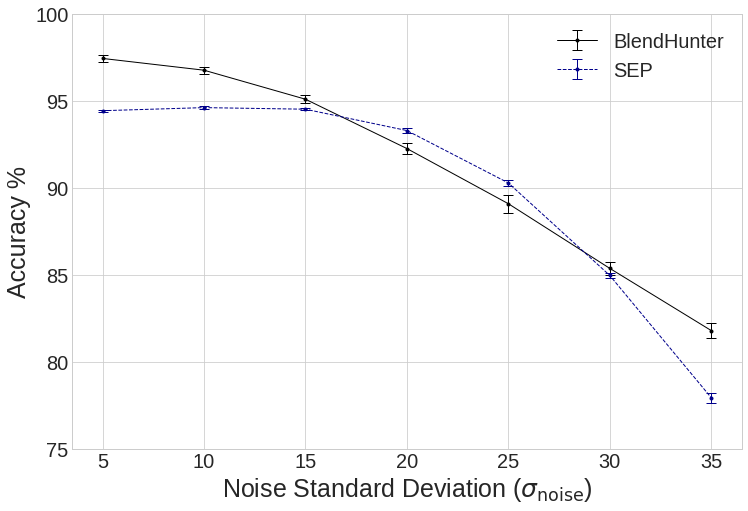

In [4]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12, 8))
plt.errorbar(noise_sigma, bh_mean*100, yerr=bh_std*100, color='k', marker='.', linestyle='-', linewidth=1,
             capsize=5, label='BlendHunter')
plt.errorbar(noise_sigma, sep_mean*100, yerr=sep_std*100, color='darkblue', marker='.', linestyle='--', linewidth=1,
             capsize=5, label='SEP')
plt.xlabel(r'Noise Standard Deviation ($\sigma_{\mathrm{noise}}$)', fontsize=25)
plt.ylabel('Accuracy %', fontsize=25)
plt.ylim(75, 100)
plt.legend(fontsize=20)
plt.tick_params(labelsize=20)
plt.savefig('bh_vs_sep_sim.pdf',bbox_inches='tight')

In [5]:
labels = ['blended' for i in range(40000)] + ['not_blended' for i in range(40000)]

In [6]:
bh_mean, bh_std = get_acc('cosmos_results_pad', out_path, noise_sigma, n_noise_real, labels)

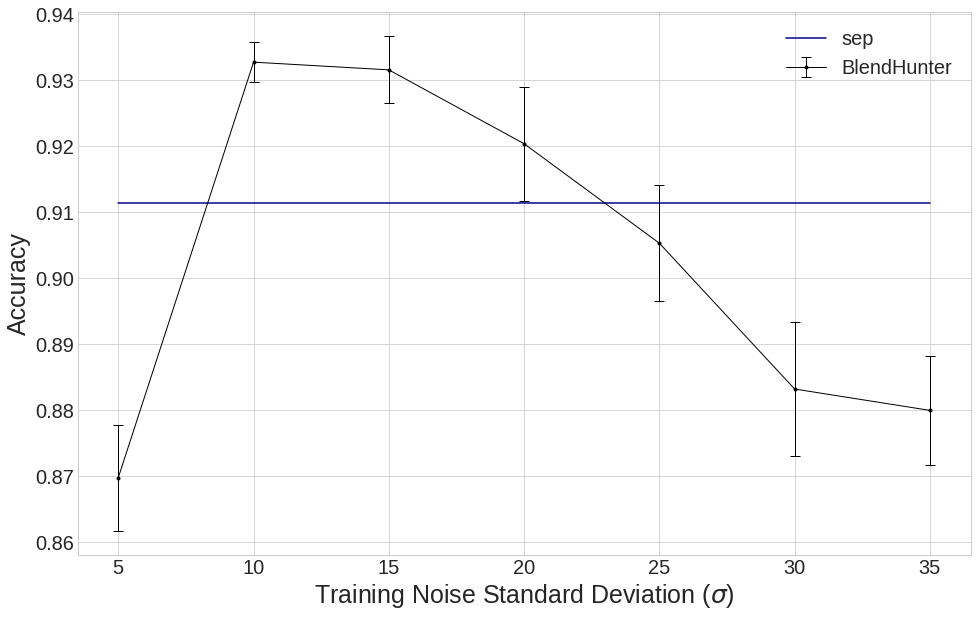

In [7]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(16, 10))
plt.errorbar(noise_sigma, bh_mean, yerr=bh_std, color='k', marker='.', linestyle='-', linewidth=1,
             capsize=5, label='BlendHunter')
plt.xlabel('Training Noise Standard Deviation ($\sigma$)', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
#plt.title("Cosmos Results",fontsize=20)
plt.plot([5,35],[0.9113,0.9113],color='darkblue',label = 'sep')
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.savefig("cosmos_results.pdf",bbox_inches='tight')

In [8]:
labels_close = ['blended' for i in range(4838)] + ['not_blended' for i in range(4838)]

bh_mean_close, bh_std_close = get_acc('../deblending_close/cosmos_results_pad', out_path, noise_sigma, n_noise_real, labels_close)

In [9]:
labels_far = ['blended' for i in range(34961)] + ['not_blended' for i in range(34961)]
bh_mean_far, bh_std_far = get_acc('../deblending_far/cosmos_results_pad', out_path, noise_sigma, n_noise_real, labels_far)

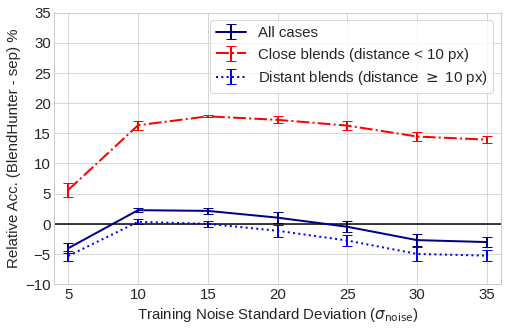

In [10]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 5))

##All
plt.errorbar(noise_sigma, 100*(bh_mean-0.91), yerr=100*bh_std, color='darkblue', linestyle='-', linewidth=2,
             capsize=5, label='All cases')

##Close
plt.errorbar(noise_sigma, 100*(bh_mean_close-0.69), yerr=100*bh_std_close, color='red', linestyle='-.', linewidth=2,
             capsize=5, label='Close blends (distance < 10 px)')

##Far
plt.errorbar(noise_sigma, 100*(bh_mean_far-0.94), yerr=100*bh_std_far, color='blue', linestyle=':', linewidth=2,
             capsize=5, label='Distant blends (distance $\geq$ 10 px)')

plt.plot([0,40],[0,0],'k')
plt.xlabel(r'Training Noise Standard Deviation ($\sigma_{\mathrm{noise}}$)', fontsize=15)
plt.ylabel('Relative Acc. (BlendHunter - sep) %', fontsize=15)
plt.ylim([100*-.1,100*.35])
plt.xlim([4,36])
plt.tick_params(labelsize=15)
plt.legend(fontsize=15,frameon=True,fancybox=True)
plt.savefig("cosmos_results.pdf",bbox_inches='tight')